# Simple exploration of Higgs data first 21 variables

## Exploration of untransformed data

In [1]:
using Base.CoreLogging
using Logging

using DataFrames
using Statistics
using CSV
using MultivariateStats

using CairoMakie
using GLMakie
using Colors, ColorSchemes


### Check your data location

In [2]:
higgs = CSV.File("/home/jpboth/Data/HIGGS.csv", header=false);


In [3]:
data = higgs|>DataFrame|>Matrix

11000000×29 Matrix{Float64}:
 1.0  0.869293  -0.635082   0.22569     …  0.721657  0.988751  0.876678
 1.0  0.907542   0.329147   0.359412       0.779732  0.992356  0.798343
 1.0  0.798835   1.47064   -1.63597        0.803252  0.865924  0.780118
 0.0  1.34438   -0.876626   0.935913       0.8692    1.02674   0.957904
 1.0  1.10501    0.321356   1.5224         1.1333    0.872245  0.808487
 0.0  1.59584   -0.607811   0.00707492  …  0.430553  0.961357  0.957818
 1.0  0.409391  -1.88468   -1.02729        0.698653  0.977314  0.828786
 1.0  0.933895   0.62913    0.527535       0.849195  0.894356  0.774879
 1.0  1.40514    0.536603   0.689554       1.54297   3.53483   2.74075
 1.0  1.17657    0.104161   1.397          0.84914   0.937104  0.812364
 1.0  0.945974   1.11124    1.21834     …  0.775879  0.783311  0.725122
 0.0  0.739357  -0.17829    0.829934       1.25098   0.830045  0.761308
 1.0  1.3841     0.116822  -1.17988        0.861141  0.929341  0.838302
 ⋮                                  

####  Get correlation matrix, first column is higgs label, we extract other columns

In [4]:
rhomat = cor(data[1:end, 2:end])

28×28 Matrix{Float64}:
  1.0          -0.000152949  -0.000175311  …   0.0958414     0.141168
 -0.000152949   1.0           0.000418424     -1.06098e-5    7.17252e-5
 -0.000175311   0.000418424   1.0              0.000206968   0.000320931
 -0.139528     -0.000437662  -1.15811e-5       0.213948      0.298656
  0.00023164    0.000160641  -0.0445178        0.000426603   0.000329097
  0.165798     -0.000395768  -0.000134923  …   0.480738      0.450244
 -0.000134815   0.264797      0.000793059      0.000527619   0.0003289
 -0.000334966  -0.00018676   -0.16788         -0.000167436  -0.000163631
 -0.00626471    0.000274971  -0.000178015      0.111227      0.00305039
  0.00461193    0.000122807  -0.000240932      0.432508      0.383743
  3.07896e-5    0.264615      0.000418659  …   0.000151138   5.68238e-5
  7.14092e-5   -0.000418047  -0.0936805       -5.20541e-5   -7.79026e-6
 -0.0056318    -0.000262932   2.6951e-5        0.0642956     0.0381951
  ⋮                                        ⋱    

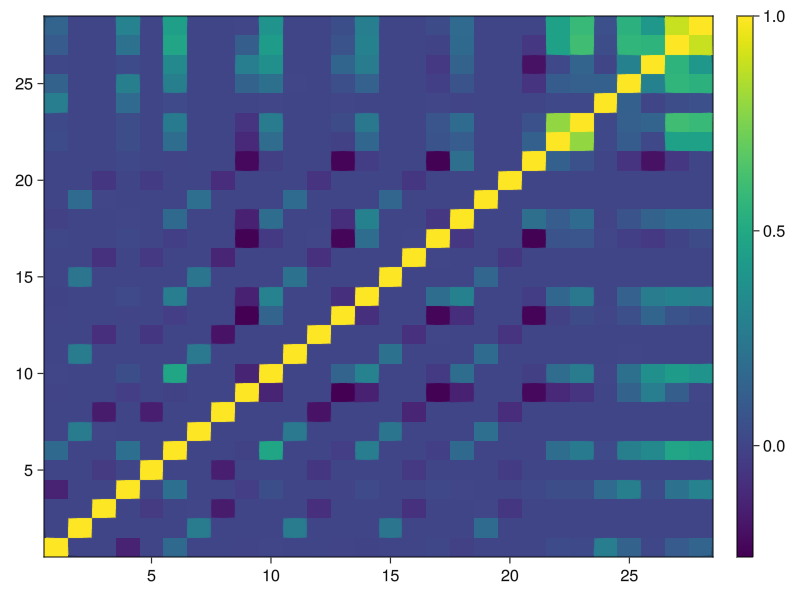

In [5]:
fig,ax, hm = heatmap(rhomat)
Colorbar(fig[:, end+1], hm)
fig

#### Covariance matrix

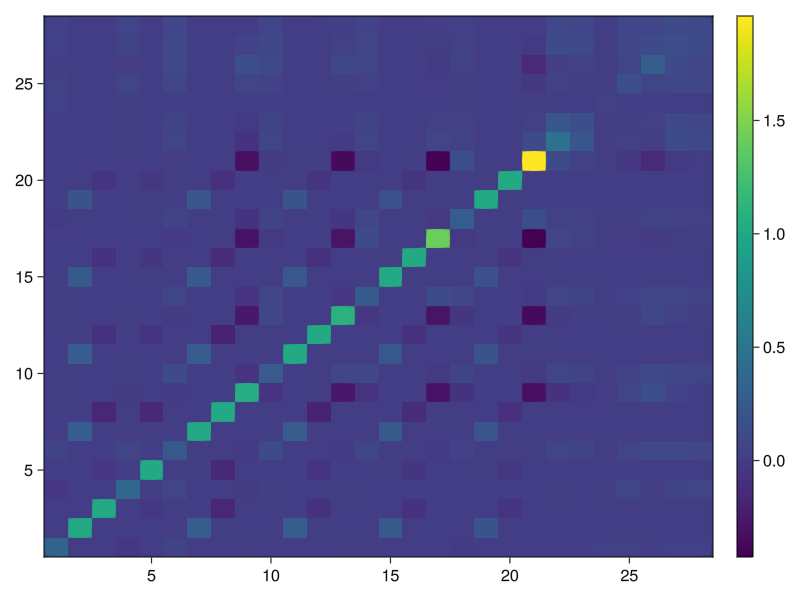

In [6]:
fig,ax, hm = heatmap(cov(data[1:end, 2:end]))
Colorbar(fig[:, end+1], hm)
fig

### Some columns takes only 3 values : columns 10, 14 and 18

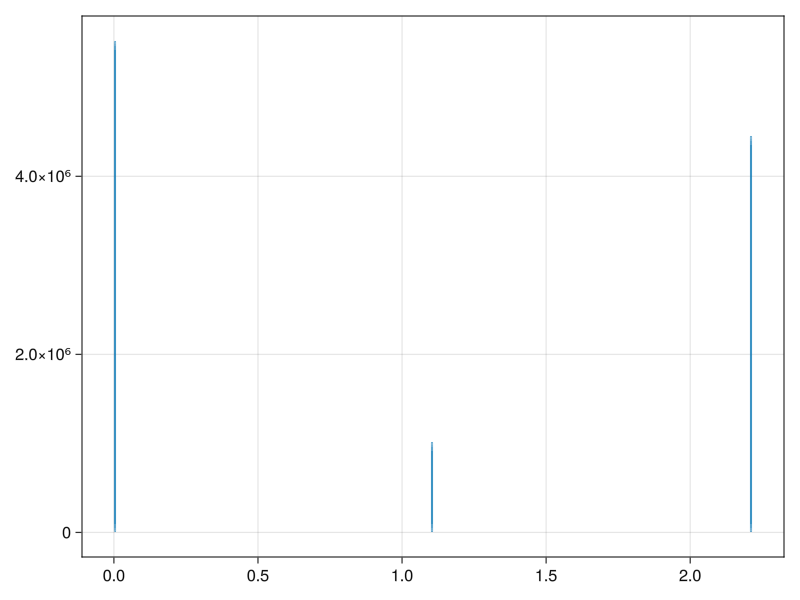

In [7]:
hist(data[1:end, 14], bins = 300)

### Columns 4 and 6 have intermediate variations

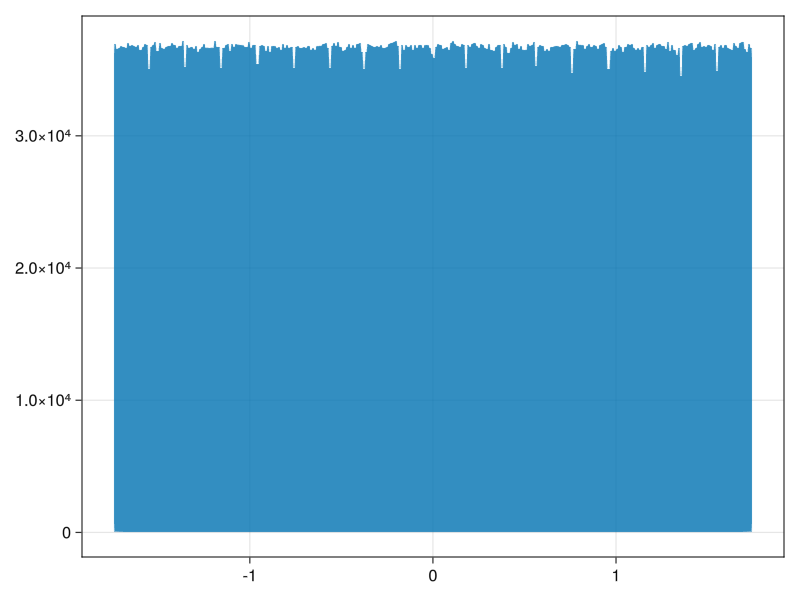

In [8]:
hist(data[1:end, 4], bins = 300)

In [9]:
mycolors = ColorScheme(distinguishable_colors(10, transform=protanopic))

#### Some 2 d graphics using the variables axis

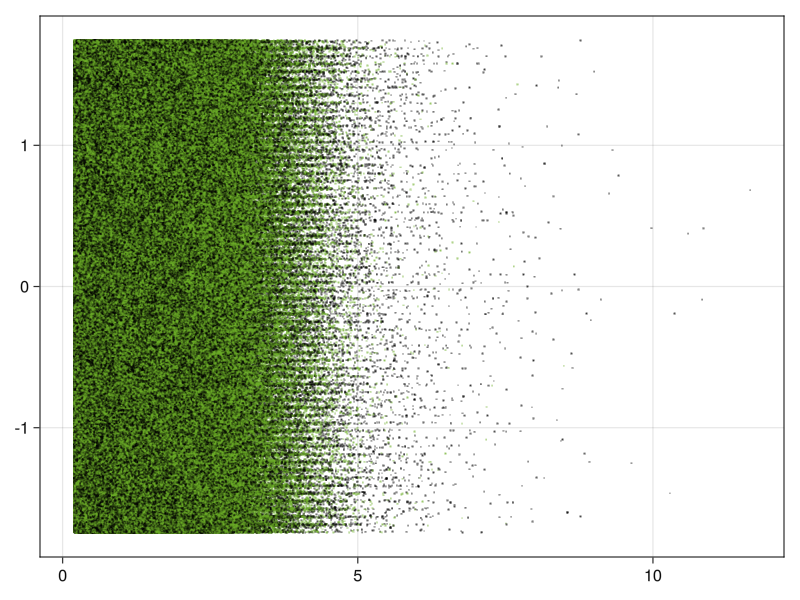

In [10]:
fig = CairoMakie.scatter(data[1:end, 11], data[1:end, 9], color = mycolors[data[1:end,1]], markersize=1)

#### The 2 following images show that for low values of 5th variable we get segregation of label 1 (Boson)

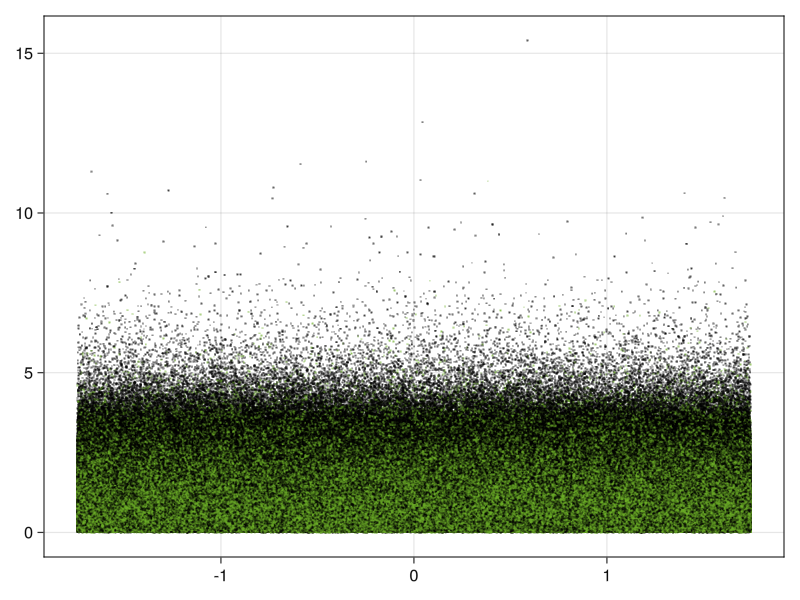

In [11]:
fig = CairoMakie.scatter(data[1:end, 4], data[1:end, 5], color = mycolors[data[1:end,1]], markersize=1)

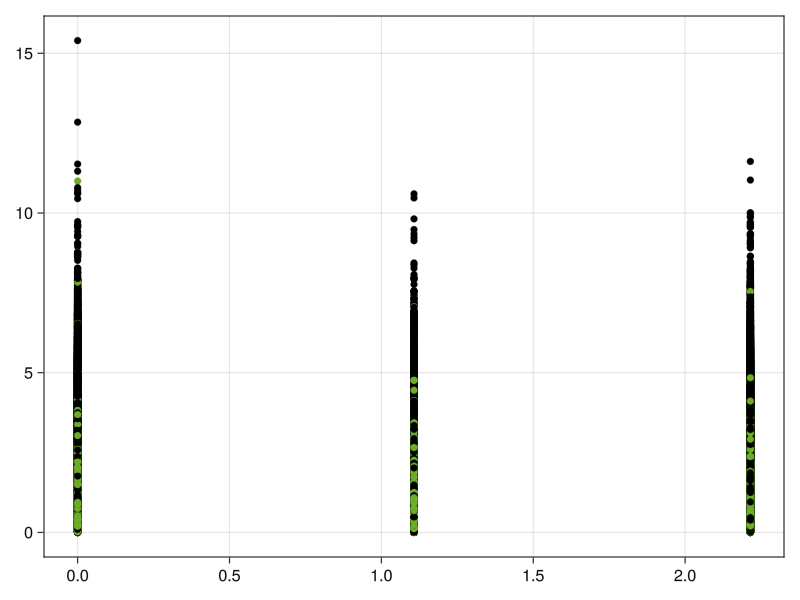

In [12]:
fig = CairoMakie.scatter(data[1:end, 14], data[1:end, 5], color = mycolors[data[1:end,1]], markersize=10)

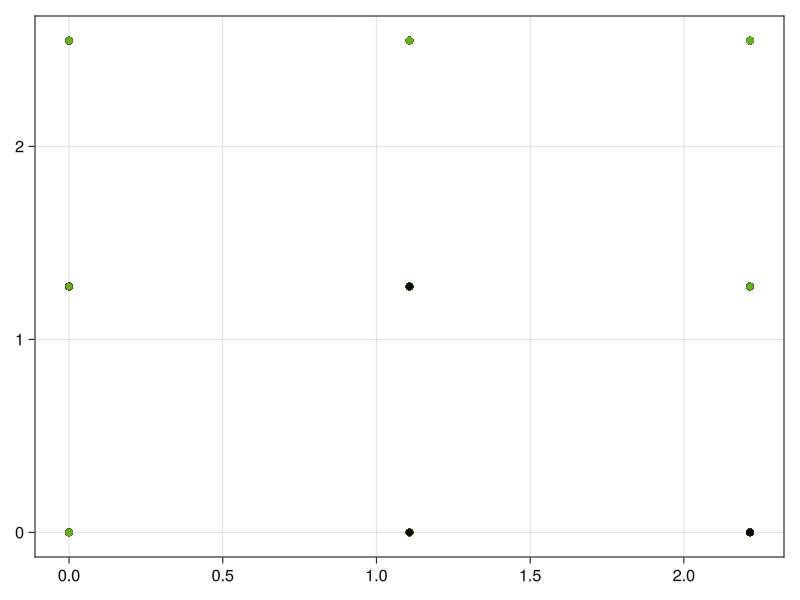

In [13]:
fig = CairoMakie.scatter(data[1:end, 14], data[1:end, 18], color = mycolors[data[1:end,1]], markersize=10)

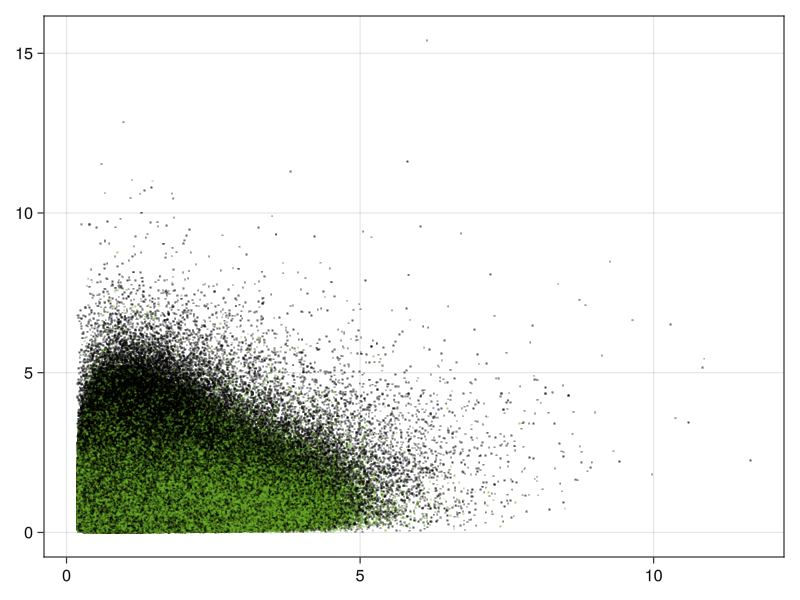

In [14]:
fig = CairoMakie.scatter(data[1:end, 11], data[1:end, 5], color = mycolors[data[1:end,1]], markersize=1)

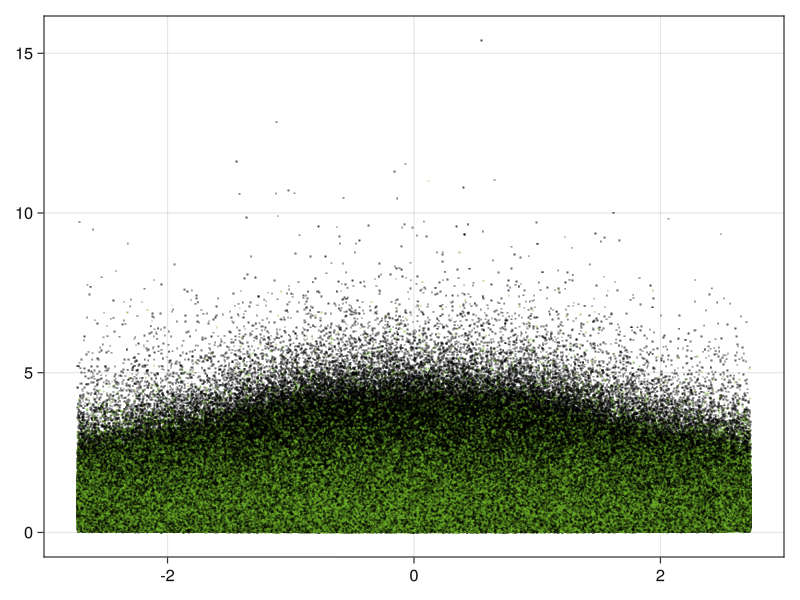

In [15]:
fig = CairoMakie.scatter(data[1:end, 16], data[1:end, 5], color = mycolors[data[1:end,1]], markersize=1)

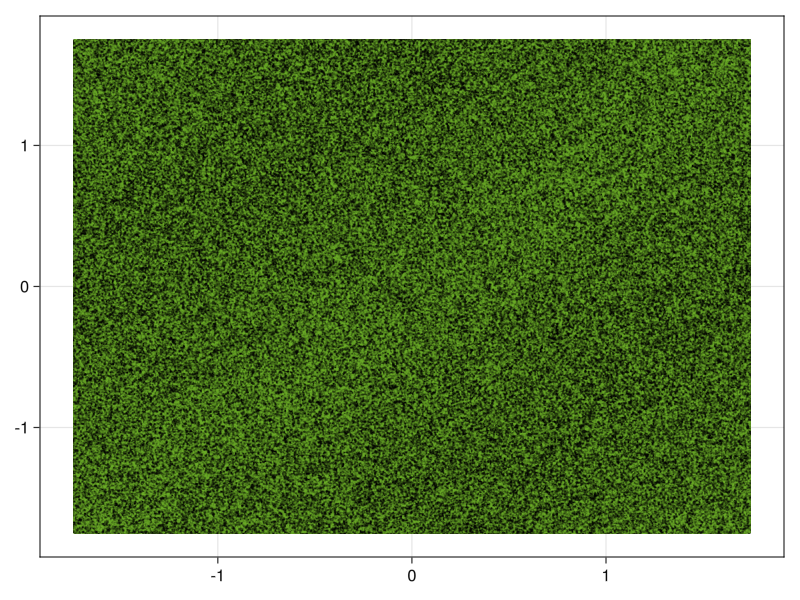

In [16]:
fig = CairoMakie.scatter(data[1:end, 17], data[1:end, 6], color = mycolors[data[1:end,1]], markersize=1)

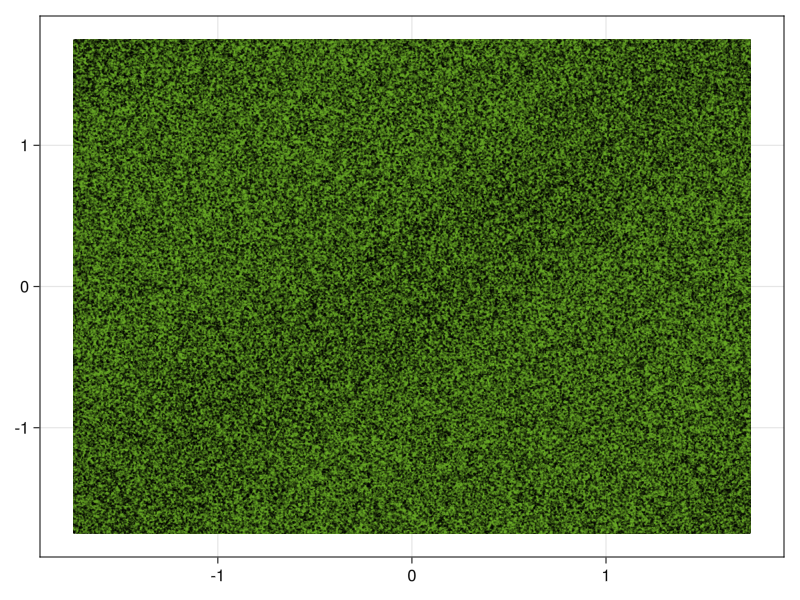

In [17]:
fig = CairoMakie.scatter(data[1:end, 17], data[1:end, 9], color = mycolors[data[1:end,1]], markersize=1)

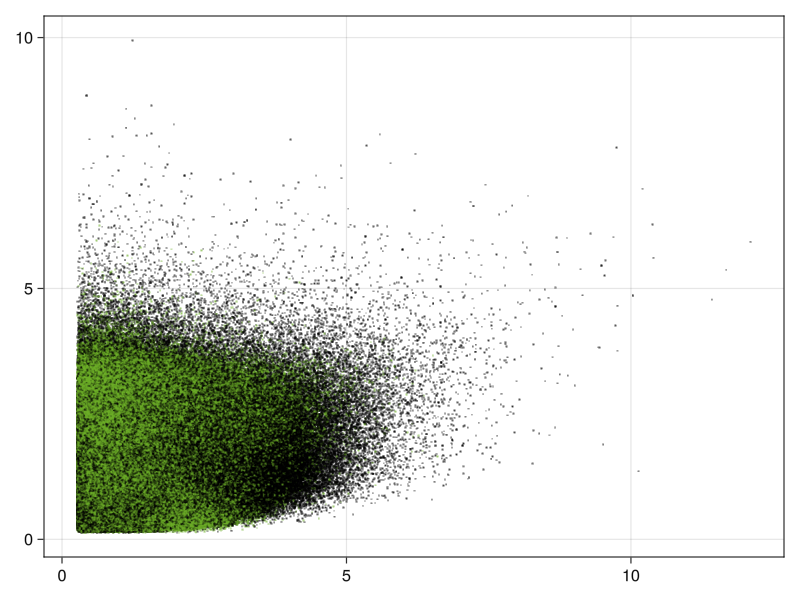

In [18]:
fig = CairoMakie.scatter(data[1:end, 2], data[1:end, 7], color = mycolors[data[1:end,1]], markersize=1)

### the  variable 2 segregate boson to low values

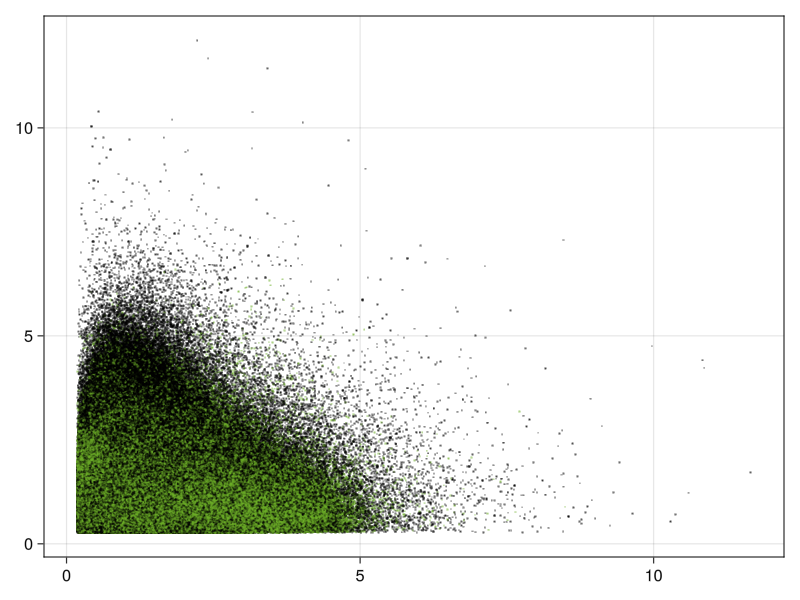

In [19]:
fig = CairoMakie.scatter(data[1:end, 11], data[1:end, 2], color = mycolors[data[1:end,1]], markersize=1)

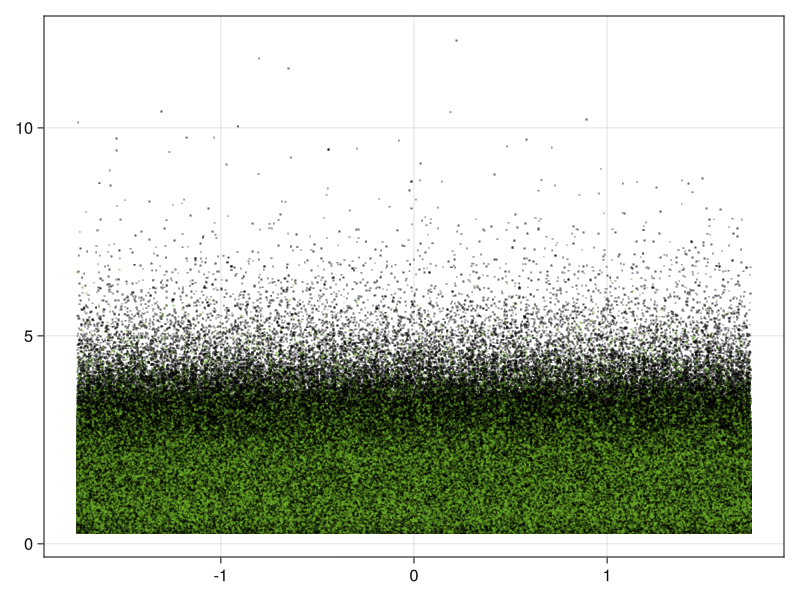

In [20]:
fig = CairoMakie.scatter(data[1:end, 9], data[1:end, 2], color = mycolors[data[1:end,1]], markersize=1)

### here boson is seem to be on higher values of column 7

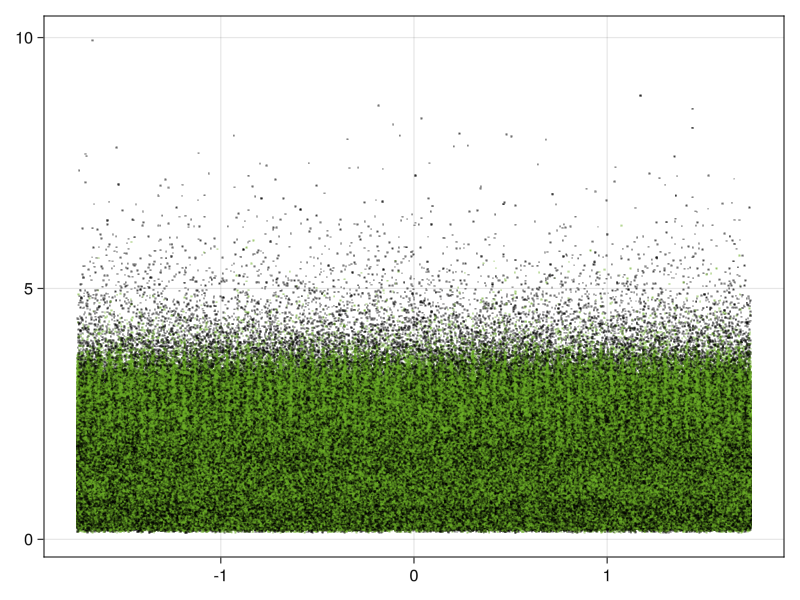

In [21]:
fig = CairoMakie.scatter(data[1:end, 9], data[1:end, 7], color = mycolors[data[1:end,1]], markersize=1)

## PCA extraction

In [22]:
M =fit(PCA, transpose(data[1:end, 2:21]), maxoutdim=3)

PCA(indim = 20, outdim = 3, principalratio = 0.3007994079130139)

Pattern matrix (unstandardized loadings):
────────────────────────────────────────────
             PC1           PC2           PC3
────────────────────────────────────────────
1    8.1824e-5     0.00468174   -0.000175802
2    0.659228     -0.000225685  -0.000731959
3    0.00245679   -0.000170833  -0.000296068
4   -0.000231999   0.0138478     0.0144044
5   -0.00103286    0.00126821   -0.00154365
6   -0.000173286   0.00063788    0.00763575
7    0.658532      0.000195627  -0.000139489
8   -0.000560635  -0.00333554    0.00219058
9   -6.5704e-5    -0.407929     -0.809207
10  -0.000212128  -0.0171588     0.10897
11   0.641732      2.68532e-5    5.38933e-5
12   0.000154138   0.00296604    0.00097627
13  -0.000113545  -0.428967      0.836845
14   0.000200965   0.121923      0.031345
15   0.595848     -0.000494659   0.000520778
16  -0.000137057   0.00209009   -0.00230659
17   0.000786975   1.13941       0.0231681
18   9.47198e-6

### The second component has main coefficients on columns 9, 13, 17 i.e original variables  10,14,18 which take only 3 values

## We will construct 2d random projection of data to generate images

- We center, rescale the data.
- We use a sparse random 2 dimensional projection (See Achlioptas 2003)

In [23]:

# center and rescale column 2 to end keeping label boson/notboson column
function rescale(data) 
    m = mean(data[1:end, 2:end], dims=1)
    s2 = var(data[2:end], dims=1)
    #
    datan = deepcopy(data)
    datan[1:end, 2:end] = (datan[1:end, 2:end] .- m) ./ sqrt.(s2)
    return datan
end


# generate basic random value for creation of random orthogonal matrix (See Achlioptas 2003)
function randval(s)
    xsi = rand()
    if xsi < 1. / (2. * s)
        return sqrt(s)
    elseif xsi < 1. / s
        return - sqrt(s)
    else 
        return 0.
    end
end

# return sparse random orthogonal matrix (See Achlioptas 2003)
function randmatrix((nrow, ncol), s) 
    ra = zeros(ncol, 2)
    map!(x -> randval(s), ra, ra)
    return ra
end


# computes data * random projection matrix. Input a (n,m) matrix, ouptut a (n,2) matrix
function proj2d(data)
    dima = size(data)
    rp = randmatrix(dima, 3.)
    return data * rp
end


# takes as input full higgs data (possibly centered, rescaled) with boson/not boson in first column and 
# project data from column 2 to end via random projection,
# restore boson/ notboson in first column to get labels
function higgsproj2d(data) 
    aux =  data[1:end, 2:end]
    projected = proj2d(aux)
    # restore first column?
    newdata = fill(1., (size(data)[1], 3))
    newdata[1:end, 2:3] = projected
    # transfer labels into first column
    newdata[1:end,1] = data[1:end,1]
    return newdata
end



higgsproj2d (generic function with 1 method)

In [24]:
ndata = rescale(data)

11000000×29 Matrix{Float64}:
 1.0  -0.127519   -0.662866   0.235581    …  -0.0462226   -0.0867718
 1.0  -0.0875964   0.34356    0.375154       -0.04246     -0.168536
 1.0  -0.201061    1.53501   -1.70755        -0.174424    -0.187558
 0.0   0.368363   -0.91498    0.976884       -0.00657474  -0.00199151
 1.0   0.118512    0.335427   1.58904        -0.167827    -0.157948
 0.0   0.630822   -0.634401   0.00739838  …  -0.0748155   -0.00208134
 1.0  -0.607547   -1.96715   -1.07223        -0.0581596   -0.13676
 1.0  -0.0600899   0.65667    0.550635       -0.144748    -0.193026
 1.0   0.431781    0.560094   0.719745        2.61128      1.85888
 1.0   0.1932      0.108727   1.45815        -0.10013     -0.153901
 1.0  -0.0474827   1.15988    1.27167     …  -0.260653    -0.244961
 0.0  -0.263142   -0.186084   0.866268       -0.211874    -0.207191
 1.0   0.409814    0.121943  -1.2315         -0.108233    -0.126827
 ⋮                                        ⋱               
 1.0  -0.072124   -0.2745

### Each time you run the following cell generate another image of a random projection of data

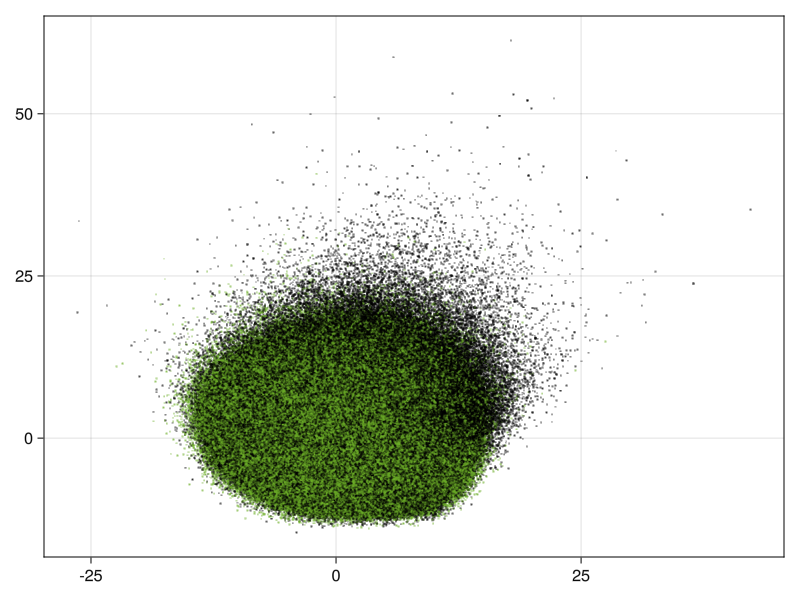

In [25]:
data2d=higgsproj2d(ndata)
fig = CairoMakie.scatter(data2d[1:end, 2], data2d[1:end, 3], color = mycolors[data2d[1:end,1]], markersize=1)